## Hovmöller plot of ssh along the coast


In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from scipy import signal
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
def create_nc_file(dist_array, time_array, curtain_data, filename,
                   title, description, units='m', name='SSH'):
    
    """ This function creates a netCDF4 file for
    the curtain plot data given the filename. 
    
    :arg dist_array: np 2D array, distance from bay array from meshgrid
    :arg time_array: np 2D array, time array from meshgrid
    :arg curtain_data: np 2D array of data to plot in curtain hovmöller. Size is (len(dist_array),len(time_array))
    :arg filename: str, Directory and name of netcdf file
    :arg title: str, title of plot
    :arg description: str, Details about the data
    """
    dataset = Dataset(filename, 'w')
    file_x = dataset.createDimension('x', curtain_data.shape[1])
    file_t = dataset.createDimension('t', curtain_data.shape[0])

    file_X = dataset.createVariable('X', 'f8', ('x'))
    file_T = dataset.createVariable('T', 'f8', ('t'))
    curt_data = dataset.createVariable('curtain_data', 'f8', ('t','x'))

    dataset.title = title
    dataset.author = 'Karina Ramos Musalem'
    dataset.institution = 'ICACC-UNAM'
    dataset.source = '/notebooks/MITgcm/domain5/ssh_hovmoller_at_coast_all_points.ipynb'
    dataset.description = description
    dataset.timeStamp = time.ctime(time.time())
    file_X.standard_name = 'Distance along the coast from SVB'
    file_X.units = 'km'
    file_T.standard_name = 'time'
    file_T.units = 's'
    curt_data.standard_name = name
    curt_data.units = units
    
    file_X[:] = dist_array[:]
    file_T[:] = time_array[:]
    curt_data[:] = curtain_data[:]

    dataset.close()

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp07_576x612x100_ORL_SVB/01_febTS_extraflatW/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp07_576x612x100_ORL/01_febTS_noSVB_extraflatW/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [4]:
nx = 576
ny = 612
nz = 100
nt = 720

In [5]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
times = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

In [6]:
df = pd.read_csv('coastline_points_list.txt',names=['lon_ii','lat_jj'], header=1 )

397 221 Depth at cell is 4.00 m
397 222 Depth at cell is 4.00 m
397 223 Depth at cell is 6.00 m
397 224 Depth at cell is 6.00 m
397 225 Depth at cell is 8.00 m
397 226 Depth at cell is 6.00 m
398 226 Depth at cell is 0.00 m
398 228 Depth at cell is 4.00 m
397 229 Depth at cell is 20.00 m
397 230 Depth at cell is 10.00 m
396 231 Depth at cell is 26.20 m
396 232 Depth at cell is 20.00 m
397 233 Depth at cell is 2.00 m
397 234 Depth at cell is 4.00 m
397 235 Depth at cell is 4.00 m
397 236 Depth at cell is 4.00 m
397 237 Depth at cell is 4.00 m
397 238 Depth at cell is 6.00 m
397 239 Depth at cell is 4.00 m
396 240 Depth at cell is 17.20 m
396 241 Depth at cell is 12.20 m
396 242 Depth at cell is 6.00 m
395 243 Depth at cell is 14.60 m
395 244 Depth at cell is 12.20 m
395 245 Depth at cell is 8.00 m
394 246 Depth at cell is 17.20 m
393 247 Depth at cell is 17.20 m
392 248 Depth at cell is 17.20 m
391 249 Depth at cell is 12.20 m
385 250 Depth at cell is 2.00 m
386 250 Depth at cell is 4.0

298 451 Depth at cell is 47.00 m
298 452 Depth at cell is 23.00 m
297 453 Depth at cell is 29.70 m
297 454 Depth at cell is 12.20 m
296 455 Depth at cell is 14.60 m
295 456 Depth at cell is 14.60 m
294 457 Depth at cell is 14.60 m
294 458 Depth at cell is 8.00 m
293 459 Depth at cell is 12.20 m
292 460 Depth at cell is 12.20 m
291 461 Depth at cell is 14.60 m
291 462 Depth at cell is 10.00 m
290 463 Depth at cell is 10.00 m
289 464 Depth at cell is 12.20 m
288 465 Depth at cell is 12.20 m
287 466 Depth at cell is 14.60 m
287 467 Depth at cell is 8.00 m
285 468 Depth at cell is 12.20 m
286 468 Depth at cell is 12.20 m
283 469 Depth at cell is 14.60 m
284 469 Depth at cell is 10.00 m
282 470 Depth at cell is 14.60 m
281 471 Depth at cell is 14.60 m
281 472 Depth at cell is 12.20 m
280 473 Depth at cell is 10.00 m
279 474 Depth at cell is 10.00 m
277 475 Depth at cell is 14.60 m
278 475 Depth at cell is 10.00 m
274 476 Depth at cell is 29.70 m
275 476 Depth at cell is 14.60 m
276 476 Dept

86 587 Depth at cell is 6.00 m
87 588 Depth at cell is 2.00 m
87 589 Depth at cell is 4.00 m
87 590 Depth at cell is 6.00 m
87 591 Depth at cell is 8.00 m
87 592 Depth at cell is 10.00 m
87 593 Depth at cell is 10.00 m
88 594 Depth at cell is 2.00 m
88 595 Depth at cell is 4.00 m
88 596 Depth at cell is 4.00 m
87 597 Depth at cell is 14.60 m
87 598 Depth at cell is 12.20 m
87 599 Depth at cell is 10.00 m
86 600 Depth at cell is 20.00 m
84 601 Depth at cell is 26.20 m
85 601 Depth at cell is 10.00 m
78 602 Depth at cell is 20.00 m
79 602 Depth at cell is 8.00 m
83 602 Depth at cell is 33.50 m
76 603 Depth at cell is 17.20 m
77 603 Depth at cell is 12.20 m
80 603 Depth at cell is 2.00 m
81 603 Depth at cell is 8.00 m
82 603 Depth at cell is 8.00 m
74 604 Depth at cell is 37.70 m
75 604 Depth at cell is 20.00 m
73 605 Depth at cell is 33.50 m
72 606 Depth at cell is 37.70 m
71 607 Depth at cell is 33.50 m
71 608 Depth at cell is 12.20 m
71 609 Depth at cell is 4.00 m
71 610 Depth at cell 

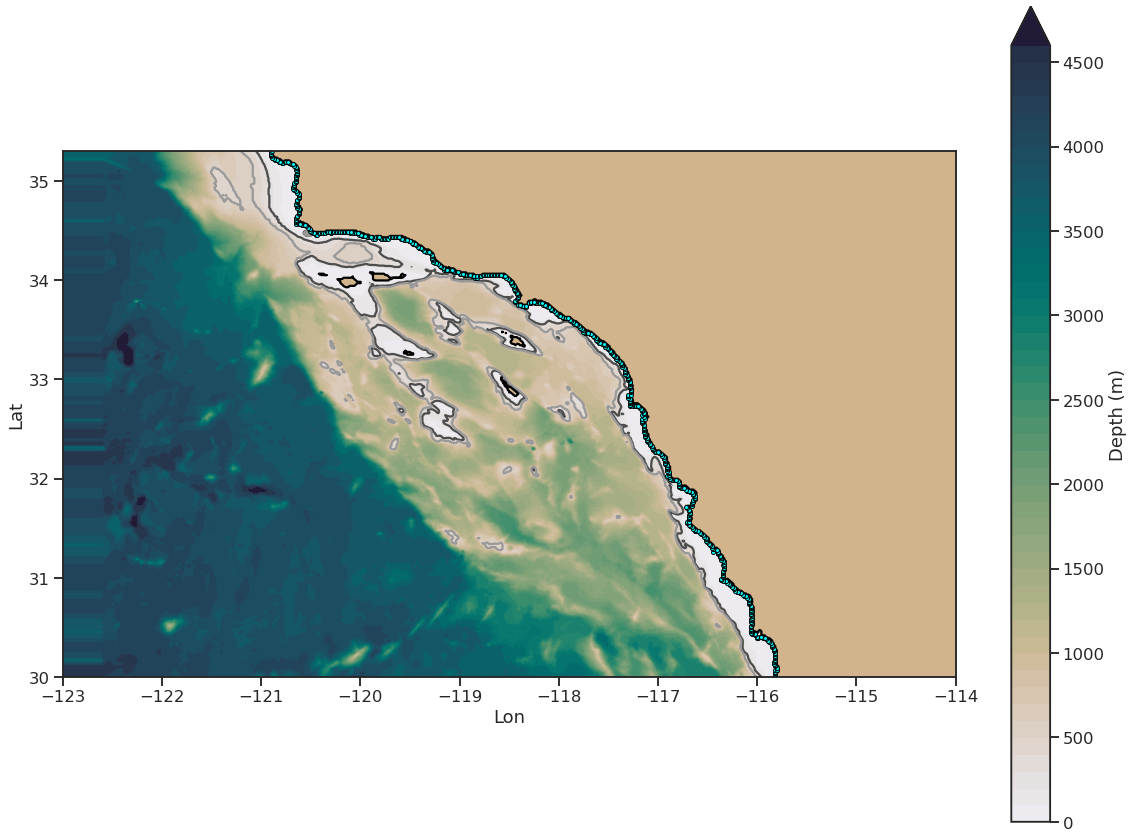

In [7]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(df.lon_ii[:], df.lat_jj[:]):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1+64],LAT[int(jj)-1,0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    print('%d %d Depth at cell is %1.2f m' % (int(ii),int(jj),depth[jj-1,ii-1+64]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(237-360, 246-360)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

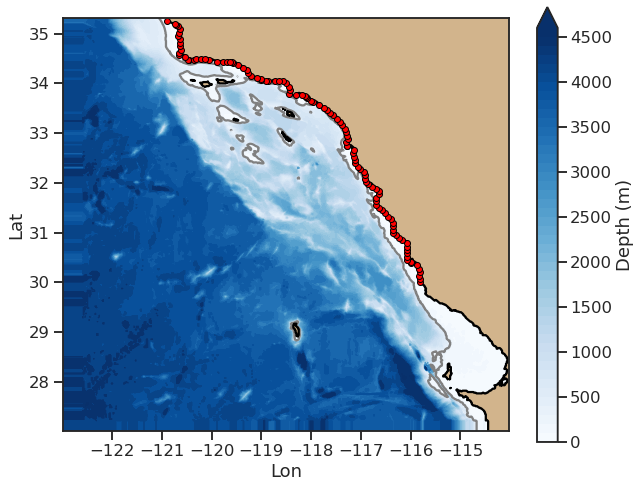

In [8]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=4500, cmap='Blues', extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.5'], 
                levels=[250])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(df.lon_ii[::5], df.lat_jj[::5]):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1+64],LAT[int(jj)-1,0],'o', 
            markersize=6, color='red', markeredgecolor='k')
cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
#ax.set_xlim(238-360, 246-360)
#ax.set_ylim(30,35.3)
ax.set_aspect(1)

### Hovmöller 

In [9]:
# Add 64 to x indices because domain 6 is 1 deg longer to the west compared to domain 5
lon_ii = np.array(df.lon_ii[:]+64)-np.ones_like(df.lon_ii+64)
lat_jj = np.array(df.lat_jj[:])-np.ones_like(df.lat_jj)

In [10]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [11]:
dist_array = np.zeros(len(lon_ii))

for kk in range(1,len(lon_ii)):
    lat1 = lat[lat_jj[kk-1]]
    lon1 = lon[lon_ii[kk-1]]
    lat2 = lat[lat_jj[kk]]
    lon2 = lon[lon_ii[kk]]
    dist_array[kk]=  distance(lat1, lon1, lat2, lon2)

In [12]:
dist_cummul = np.cumsum(dist_array)

In [13]:
times = np.arange(720)*600

101.2
313.7
493.7
659.9
903.4
1231.4
1491.3


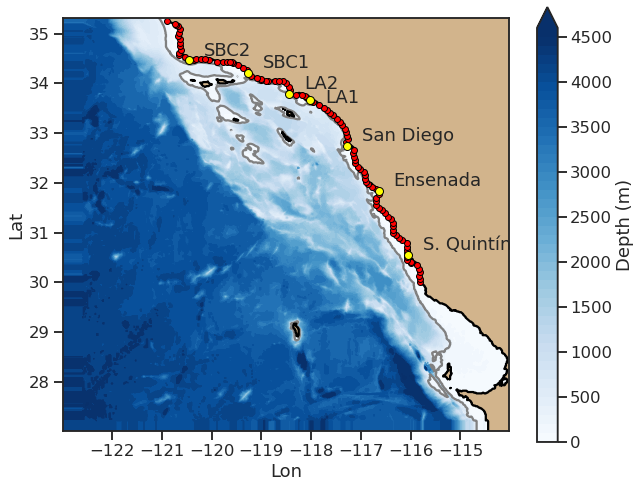

In [14]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=4500, cmap='Blues', extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.5'], 
                levels=[250])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[::5], lat_jj[::5],range(0,len(lon_ii),5)):
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=6, color='red', markeredgecolor='k')
    
for kk, lab in zip([47,150,230,307,335,400,450], ['S. Quintín', 'Ensenada','San Diego','LA1','LA2','SBC1','SBC2']):
    #print(ii,jj)
    ii = int(lon_ii[kk])
    jj = int(lat_jj[kk])
    ax.plot(LON[0,ii],LAT[jj,0],'o', 
            markersize=8, color='yellow', markeredgecolor='k')
    if lab == 'LA1':
        ax.text(LON[0,ii]+0.3,LAT[jj,0]-0.05, lab)
    else:
        ax.text(LON[0,ii]+0.3,LAT[jj,0]+0.1, lab)
        
    print('%1.1f' %dist_cummul[kk])
    
cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
#ax.set_xlim(238-360, 246-360)
#ax.set_ylim(30,35.3)
ax.set_aspect(1)

In [15]:
# This cell takes a while (about 10 min), that is why I save the data in next cell
ssh = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh[:,kk] = ds['ETAN'][:,jj,ii]

In [16]:
filename = 'curtain_SSH_SVB_dom6_febTS_exFlat.nc'
description = 'SSH data at points along the coast to build curtain hovmöller plot dom6_febTS_exFlat'
title = 'SSH curtain plot data domain 6 febTS_exFlat SVB'

create_nc_file(dist_cummul, times, ssh, filename,
               title, description, units='m', name='SSH')

Text(0.5, 1.0, 'SVB run')

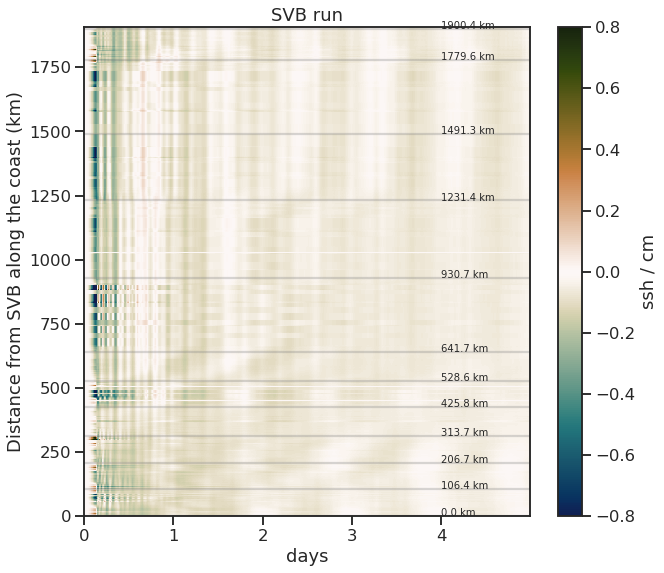

In [17]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600*24),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(4,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run')

Text(0.5, 1.0, 'SVB run')

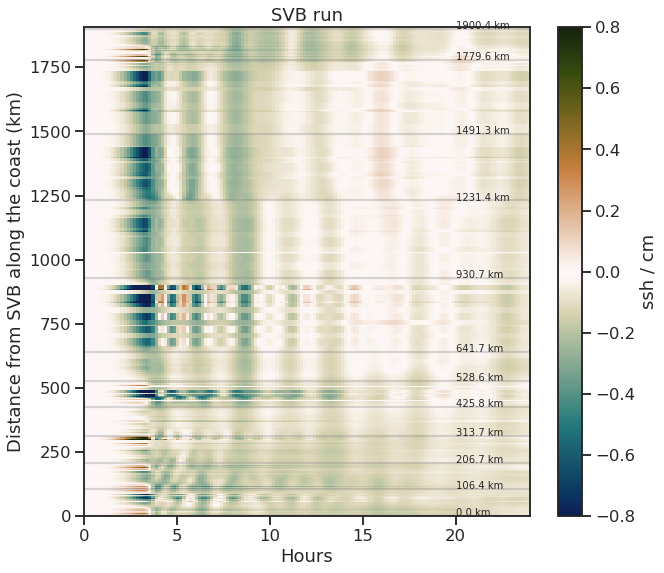

In [18]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB run')

## No SVB run

In [19]:
# This cell takes a while (about 10 min)
ssh_NOB = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh_NOB[:,kk] = ds2['ETAN'][:,jj,ii]

In [20]:
filename2 = 'curtain_SSH_NoSVB_dom6_febTS_exFlat.nc'
description2 = 'SSH data at points along the coast to build curtain hovmöller plot for no SVB run domain 6 (TSfeb_exFlat)'
title2 = 'SSH curtain plot data domain 6 febTS exFlat NO SVB'

create_nc_file(dist_cummul, times, ssh_NOB, filename2,
               title2, description2, units='m', name='SSH')

Text(0.5, 1.0, 'No SVB run')

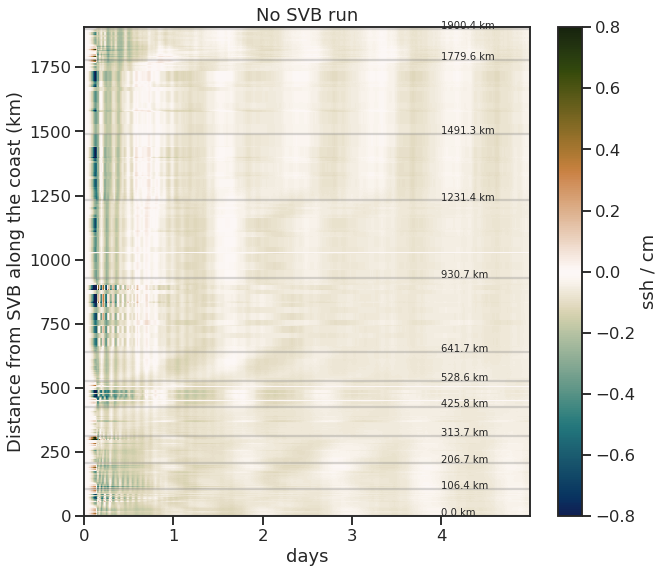

In [21]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600*24),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(4,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('No SVB run')

Text(0.5, 1.0, 'No SVB run')

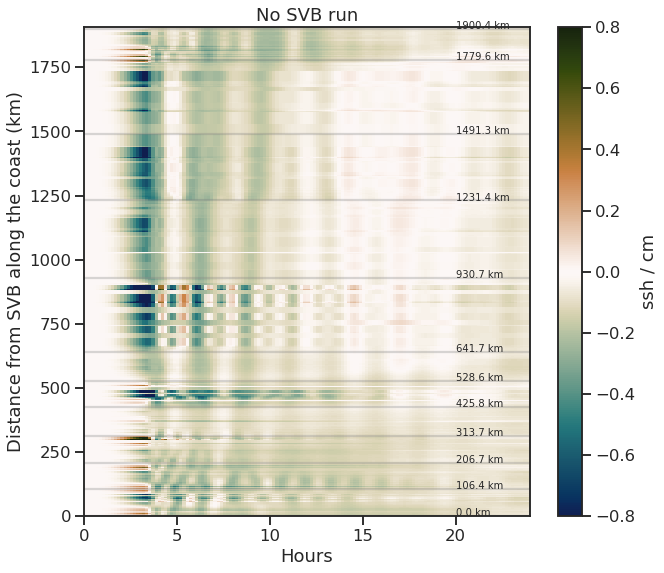

In [22]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')

# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('No SVB run')

## Bay minus no Bay 

Text(0.5, 1.0, 'SVB-No SVB')

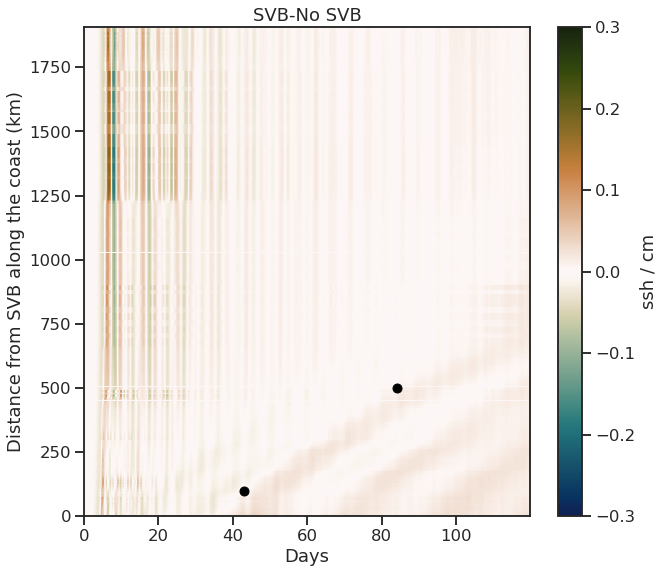

In [23]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.plot(43,100,'ko')
ax.plot(84,500, 'ko')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Days')
ax.set_title('SVB-No SVB')

Text(0.5, 1.0, 'SVB-No SVB')

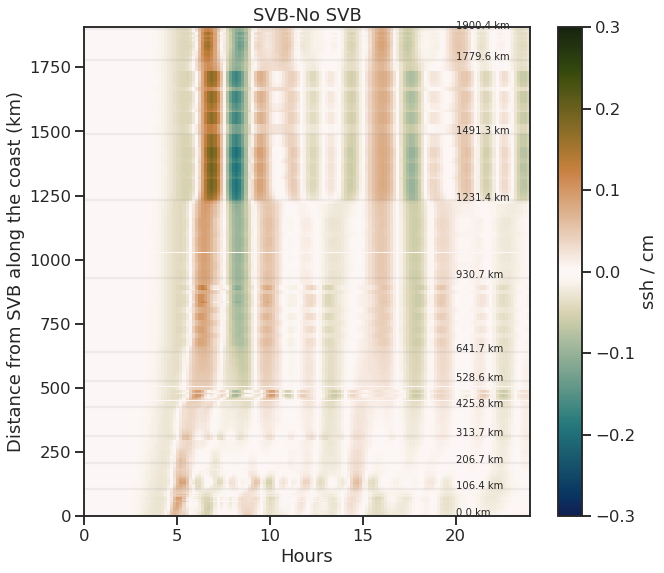

In [24]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.1)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

#ax.plot(5,0,'ko')
#ax.plot(6.6,700, 'ko')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

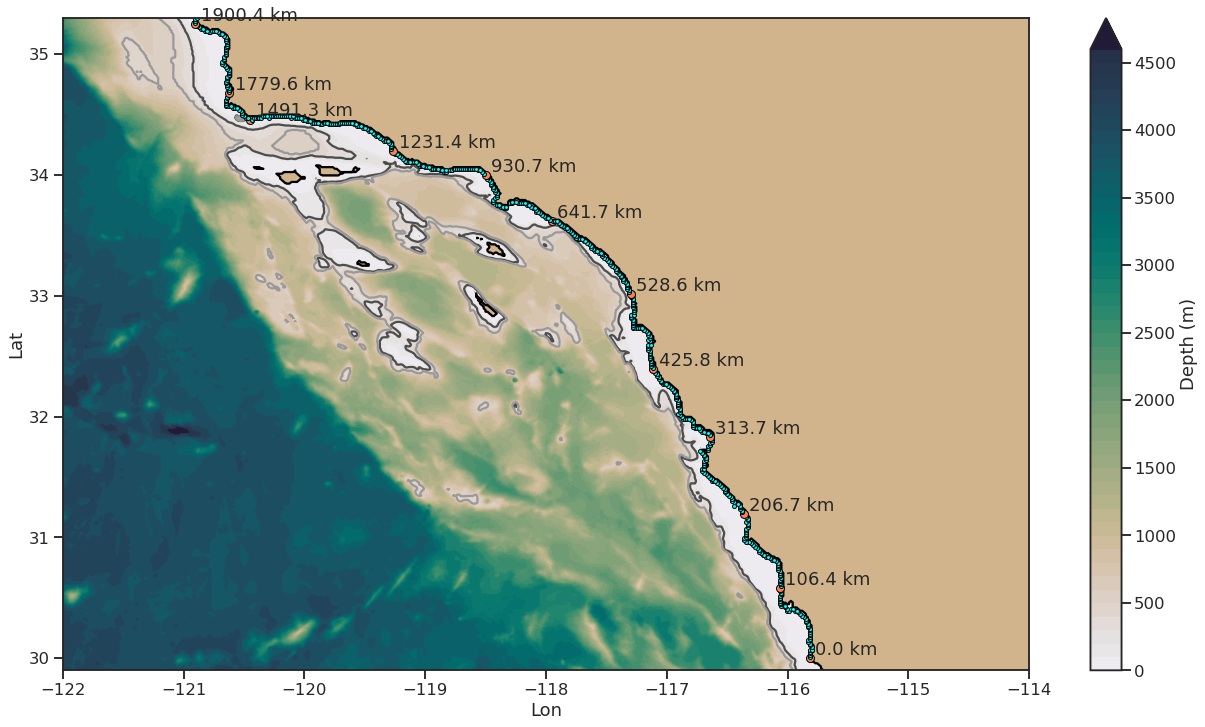

In [25]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(22,12))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[:], lat_jj[:],range(len(lon_ii))):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    if kk%50 == 0:
        ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
                markersize=8, color='coral', markeredgecolor='k')
        ax.text(LON[0,int(ii)+3],LAT[int(jj)+2,0],'%1.1f km' %dist_cummul[kk])

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(29.9,35.3)
ax.set_aspect(1)

Text(0.5, 1.0, 'SVB-No SVB')

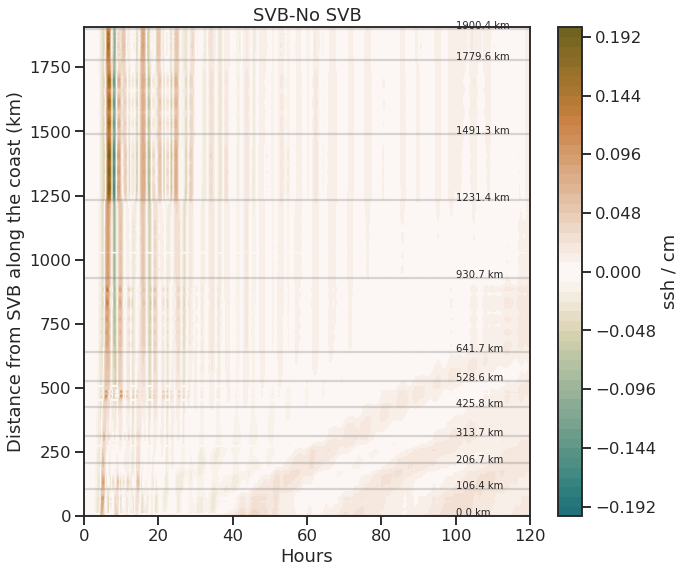

In [26]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(times/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 61,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20*5,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24*5)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

Text(0.5, 1.0, 'SVB-No SVB')

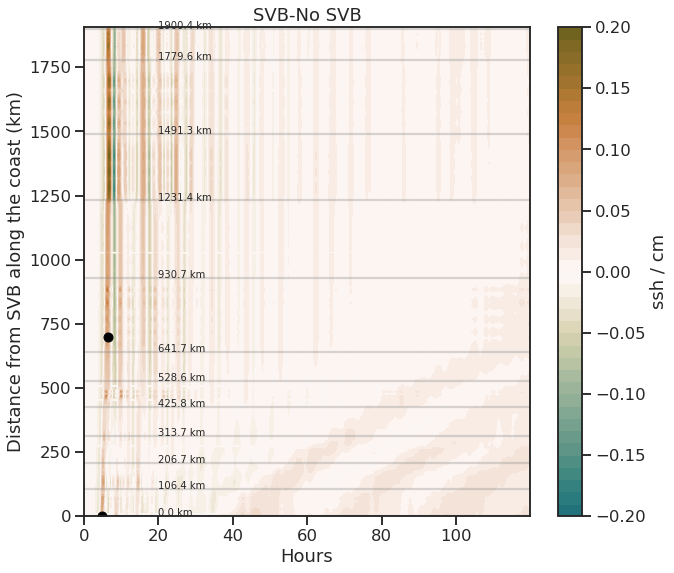

In [27]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(times/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 41,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

### Timeseries

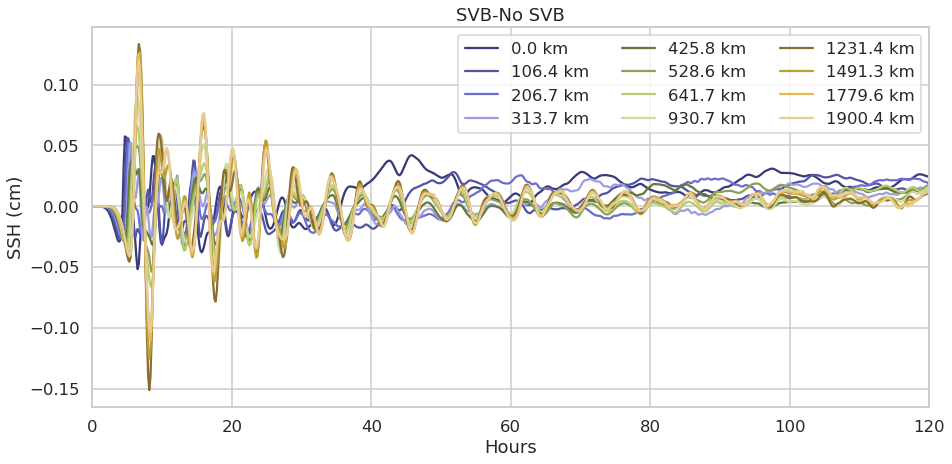

In [28]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('tab20b',n_colors=20)
fig, ax = plt.subplots(1,1,figsize=(15,7))

# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.plot(times[:]/3600,(ssh[:,kk]-ssh_NOB[:,kk])*100, label='%1.1f km' %dist_cummul[kk])

ax.set_ylabel('SSH (cm)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')
ax.set_xlim(0,120)
ax.legend(ncol=3)

In [29]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

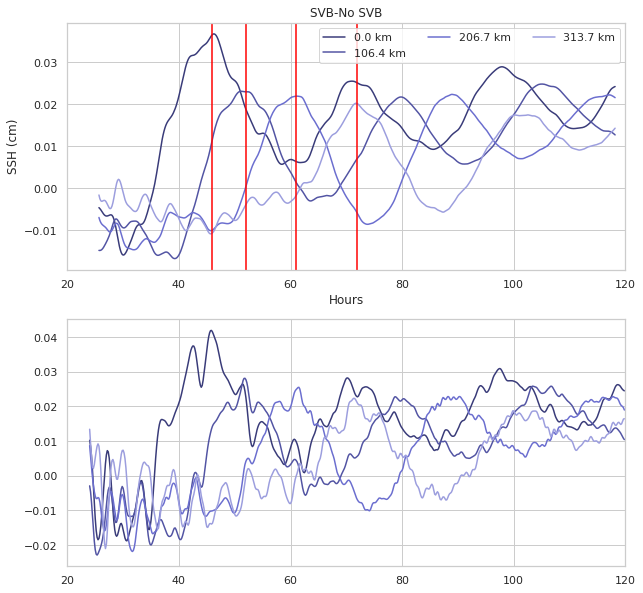

In [30]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('tab20b',n_colors=20)
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,10))

# cells along coast(ish)
for kk in [0,50,100,150]:
    avg = moving_average((ssh[144:,kk]-ssh_NOB[144:,kk])*100, 21)
    ax.plot(times[144+10:-10]/3600, avg, label='%1.1f km' %dist_cummul[kk])
    ax2.plot(times[144:]/3600,(ssh[144:,kk]-ssh_NOB[144:,kk])*100, label='%1.1f km' %dist_cummul[kk])

ax.axvline(46, color='r')
ax.axvline(52, color='r')
ax.axvline(61, color='r')
ax.axvline(72, color='r')

ax.set_ylabel('SSH (cm)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')
ax.set_xlim(20,120)
ax2.set_xlim(20,120)

ax.legend(ncol=3)

Text(0.5, 1.0, 'SSH spectra stations along the coast')

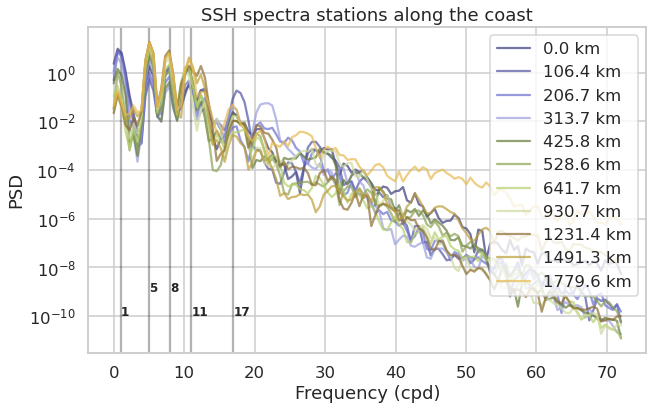

In [31]:
sns.set_style('whitegrid')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax) = plt.subplots(1,1,figsize=(10,6))

# Useful freq to period indicators
ax.axvline(1, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(5, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(8, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(11, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(17, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period

# ax.axvline(1e4/(8*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
# ax.axvline(1e4/(6*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
# ax.axvline(1e4/(3*3600), color='k', alpha=0.3, linestyle='-') # 1.2 hr 
# ax.axvline(1e4/(2.4*3600), color='k', alpha=0.3, linestyle='-') # 0.5 hr 
# ax.axvline(1e4/(240*3600), color='k', alpha=0.3, linestyle='-') # 24 hr 
ax.text(1,1E-10,'1', fontweight='bold',fontsize=12)
ax.text(5,1E-9,'5', fontweight='bold',fontsize=12)
ax.text(8,1E-9,'8', fontweight='bold',fontsize=12)
ax.text(11,1E-10,'11', fontweight='bold',fontsize=12)
ax.text(17,1E-10,'17', fontweight='bold',fontsize=12)

# ax.text(1e4/((6-0.2)*3600),3E6,'6 hr', fontweight='bold',fontsize=12)
# ax.text(1e4/((3-0.05)*3600),3E6,'3 hr', fontweight='bold',fontsize=12) 
# ax.text(1e4/((2.4-0.01)*3600),3E6,'2.4 hr', fontweight='bold',fontsize=12)

# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[:,kk]-ssh_NOB[:,kk])*100, samp_freq, detrend='constant')
    ax.semilogy(freq_per*(86400), Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax.legend()
ax.set_ylabel('PSD')
ax.set_xlabel('Frequency (cpd)')
ax.set_title('SSH spectra stations along the coast')

Text(0.5, 1.0, 'SVB-NO SVB: SSH spectra stations along the coast')

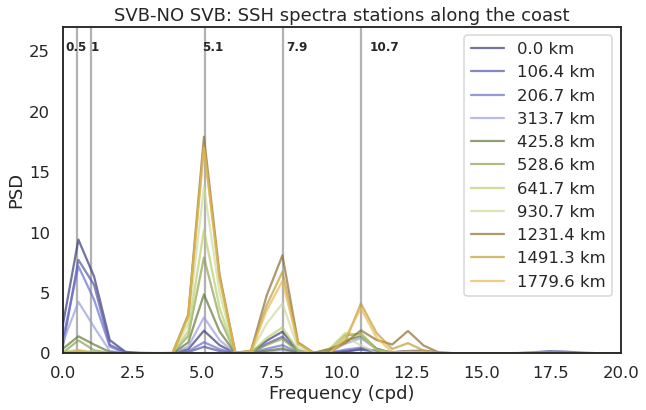

In [32]:
sns.set_style('white')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax) = plt.subplots(1,1,figsize=(10,6))

# Useful freq to period indicators
ax.axvline(0.5, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(1, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(5.1, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(7.9, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(10.7, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period

# ax.axvline(1e4/(8*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
# ax.axvline(1e4/(6*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
# ax.axvline(1e4/(3*3600), color='k', alpha=0.3, linestyle='-') # 1.2 hr 
# ax.axvline(1e4/(2.4*3600), color='k', alpha=0.3, linestyle='-') # 0.5 hr 
# ax.axvline(1e4/(240*3600), color='k', alpha=0.3, linestyle='-') # 24 hr 
ax.text(0.1,25,'0.5', fontweight='bold',fontsize=12)
ax.text(1,25,'1', fontweight='bold',fontsize=12)
ax.text(5,25,'5.1', fontweight='bold',fontsize=12)
ax.text(8,25,'7.9', fontweight='bold',fontsize=12)
ax.text(11,25,'10.7', fontweight='bold',fontsize=12)
# ax.text(1e4/((6-0.2)*3600),3E6,'6 hr', fontweight='bold',fontsize=12)
# ax.text(1e4/((3-0.05)*3600),3E6,'3 hr', fontweight='bold',fontsize=12) 
# ax.text(1e4/((2.4-0.01)*3600),3E6,'2.4 hr', fontweight='bold',fontsize=12)

# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[:,kk]-ssh_NOB[:,kk])*100, samp_freq, detrend='constant')
    ax.plot(freq_per*(86400), Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax.legend()
ax.set_ylim(0,27)
ax.set_xlim(0,20)
ax.set_ylabel('PSD')
ax.set_xlabel('Frequency (cpd)')
ax.set_title('SVB-NO SVB: SSH spectra stations along the coast')

Text(0.5, 1.0, 'NO SVB run')

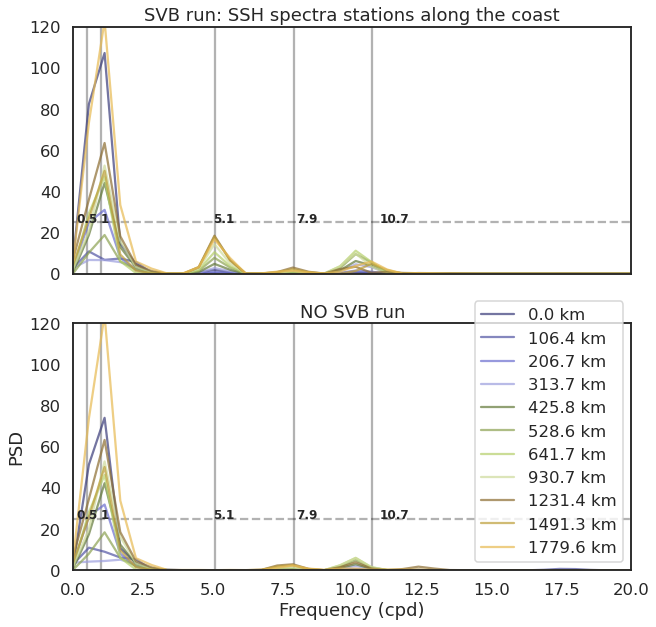

In [33]:
sns.set_style('white')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True, sharey=True)

# Useful freq to period indicators

for ax in [ax1,ax2]:
    ax.axvline(0.5, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(1, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(5.1, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(7.9, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(10.7, color='k', alpha=0.3, linestyle='-') 

    ax.axhline(25, color='k', alpha=0.3, linestyle='--') # y limit svb-nosvb spectra

    ax.text(0.1,25,'0.5', fontweight='bold',fontsize=12)
    ax.text(1,25,'1', fontweight='bold',fontsize=12)
    ax.text(5,25,'5.1', fontweight='bold',fontsize=12)
    ax.text(8,25,'7.9', fontweight='bold',fontsize=12)
    ax.text(11,25,'10.7', fontweight='bold',fontsize=12)

    
# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[:,kk])*100, samp_freq, detrend='constant')
    ax1.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])
    
# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh_NOB[:,kk])*100, samp_freq, detrend='constant')
    ax2.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax2.legend()
ax2.set_xlim(0,20)
ax2.set_ylim(0,120)
ax2.set_ylabel('PSD')
ax2.set_xlabel('Frequency (cpd)')
ax1.set_title('SVB run: SSH spectra stations along the coast')
ax2.set_title('NO SVB run')

Text(0.5, 1.0, 'SVB-NO SVB: SSH spectra stations along the coast 1st day')

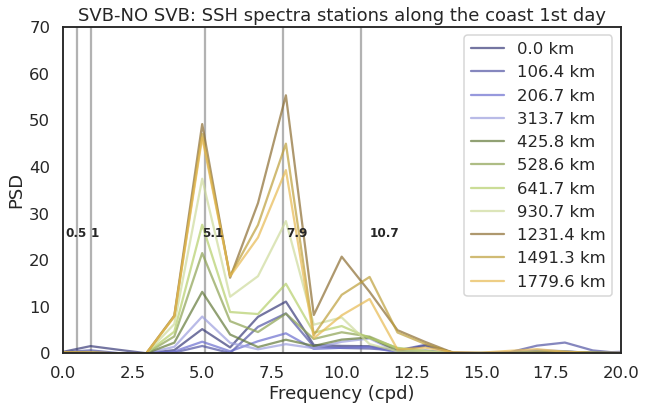

In [34]:
sns.set_style('white')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax) = plt.subplots(1,1,figsize=(10,6))

# Useful freq to period indicators
ax.axvline(0.5, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(1, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(5.1, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(7.9, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(10.7, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period

ax.text(0.1,25,'0.5', fontweight='bold',fontsize=12)
ax.text(1,25,'1', fontweight='bold',fontsize=12)
ax.text(5,25,'5.1', fontweight='bold',fontsize=12)
ax.text(8,25,'7.9', fontweight='bold',fontsize=12)
ax.text(11,25,'10.7', fontweight='bold',fontsize=12)

# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[:144,kk]-ssh_NOB[:144,kk])*100, samp_freq, detrend='constant')
    ax.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax.legend()
ax.set_ylim(0,70)
ax.set_xlim(0,20)
ax.set_ylabel('PSD')
ax.set_xlabel('Frequency (cpd)')
ax.set_title('SVB-NO SVB: SSH spectra stations along the coast 1st day')

Text(0.5, 1.0, 'NO SVB run')

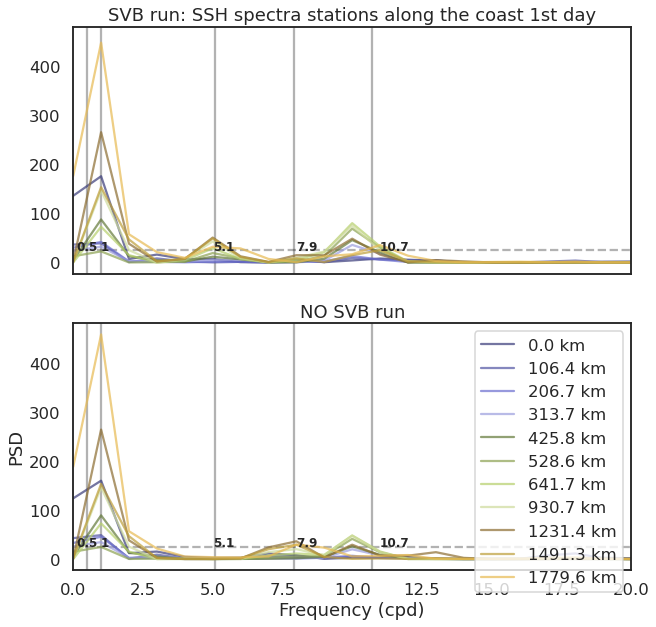

In [35]:
sns.set_style('white')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True, sharey=True)

# Useful freq to period indicators

for ax in [ax1,ax2]:
    ax.axvline(0.5, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(1, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(5.1, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(7.9, color='k', alpha=0.3, linestyle='-') 
    ax.axvline(10.7, color='k', alpha=0.3, linestyle='-') 

    ax.axhline(25, color='k', alpha=0.3, linestyle='--') # y limit svb-nosvb spectra

    ax.text(0.1,25,'0.5', fontweight='bold',fontsize=12)
    ax.text(1,25,'1', fontweight='bold',fontsize=12)
    ax.text(5,25,'5.1', fontweight='bold',fontsize=12)
    ax.text(8,25,'7.9', fontweight='bold',fontsize=12)
    ax.text(11,25,'10.7', fontweight='bold',fontsize=12)

    
# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[:144,kk])*100, samp_freq, detrend='constant')
    ax1.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])
    
# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh_NOB[:144,kk])*100, samp_freq, detrend='constant')
    ax2.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax2.legend()
ax2.set_xlim(0,20)
#ax2.set_ylim(0,240)
ax2.set_ylabel('PSD')
ax2.set_xlabel('Frequency (cpd)')
ax1.set_title('SVB run: SSH spectra stations along the coast 1st day')
ax2.set_title('NO SVB run')

Text(0.5, 1.0, 'SVB-NO SVB: SSH spectra stations along the coast after day 1')

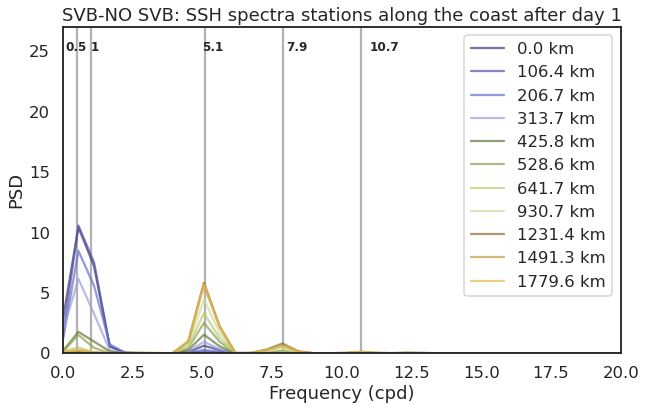

In [36]:
sns.set_style('white')
sns.set_context('talk')

samp_freq = 1/600 # 10 min data

fig,(ax) = plt.subplots(1,1,figsize=(10,6))

# Useful freq to period indicators
ax.axvline(0.5, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(1, color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
ax.axvline(5.1, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(7.9, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
ax.axvline(10.7, color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period

ax.text(0.1,25,'0.5', fontweight='bold',fontsize=12)
ax.text(1,25,'1', fontweight='bold',fontsize=12)
ax.text(5,25,'5.1', fontweight='bold',fontsize=12)
ax.text(8,25,'7.9', fontweight='bold',fontsize=12)
ax.text(11,25,'10.7', fontweight='bold',fontsize=12)

# cells along coast(ish)
for kk in [0,50,100,150,200,250,300,350,400,450,500]:
    freq_per, Pxx_den_per = signal.welch((ssh[144:,kk]-ssh_NOB[144:,kk])*100, samp_freq, detrend='constant')
    ax.plot(freq_per*86400, Pxx_den_per,'-', alpha=0.7, label='%1.1f km' %dist_cummul[kk])

ax.legend()
ax.set_ylim(0,27)
ax.set_xlim(0,20)
ax.set_ylabel('PSD')
ax.set_xlabel('Frequency (cpd)')
ax.set_title('SVB-NO SVB: SSH spectra stations along the coast after day 1')